In [26]:
## Code by Eric Englin
## This is a project for Team B3 in Harvard Kennedy School Code 4 Policy course
# This jupyter notebook pulls historical NYSE stock data for major companies in the auto & tech industry
# Please note that many car companies do not participate in the NYSE, so these companies wil

'Tesla'

TSLA
TM
NVDA
RACE
GM
HMC
FUV
HOG
FCAU
F
KNDI
NIO
TTM
SPAR
WKHS
GOOGL


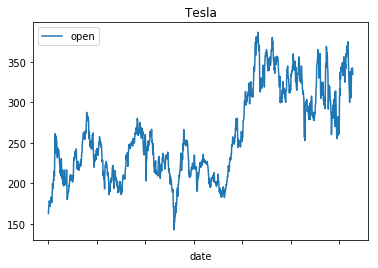

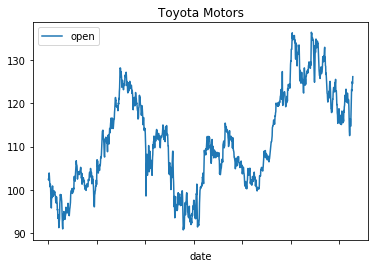

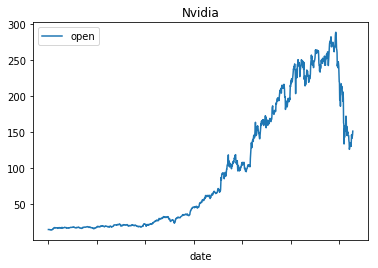

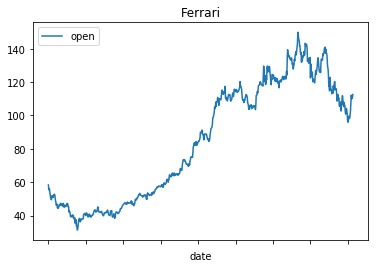

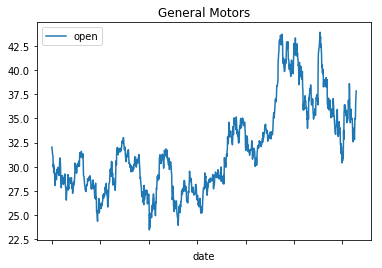

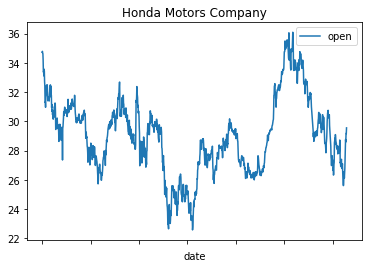

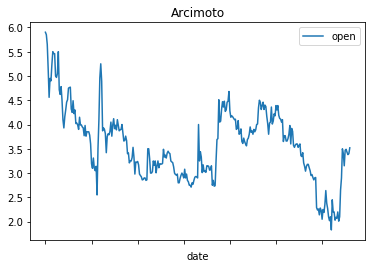

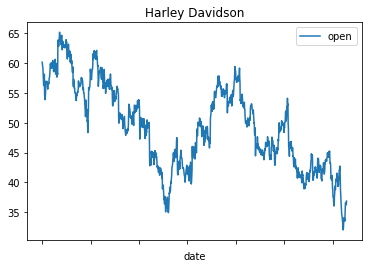

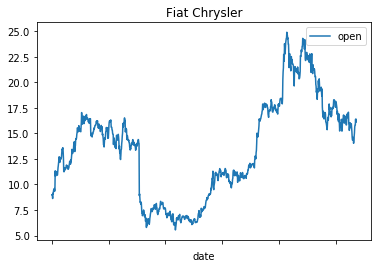

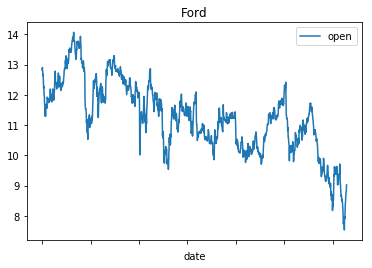

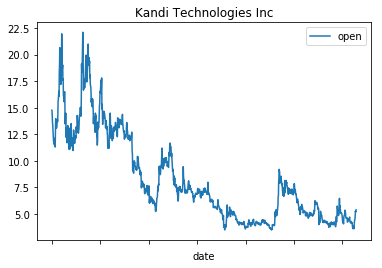

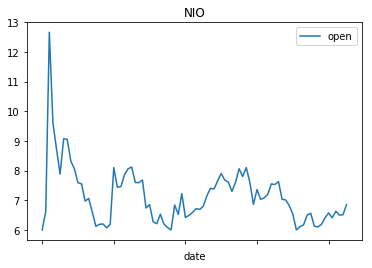

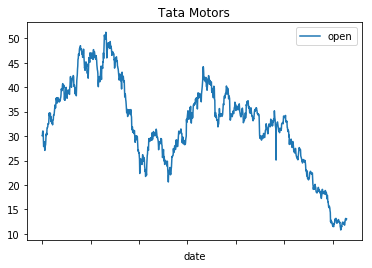

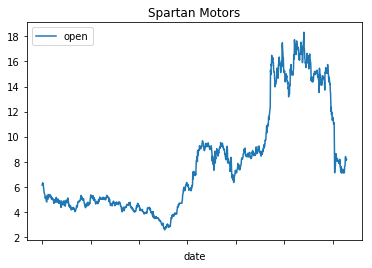

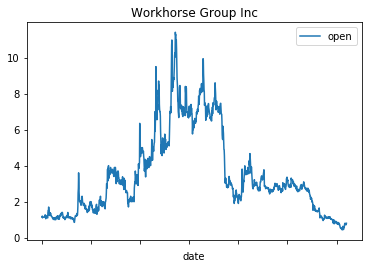

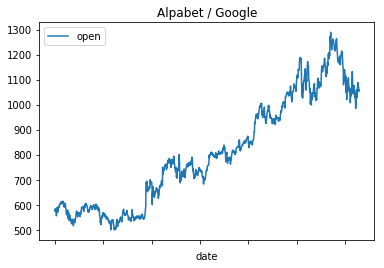

In [36]:
from datetime import datetime
from concurrent import futures
import matplotlib.pyplot as plt

import pandas as pd
from pandas import DataFrame
import pandas_datareader.data as web


auto = ['TSLA','TM','NVDA','RACE','GM','HMC','FUV','HOG','FCAU','F','KNDI',
        'NIO','TTM','SPAR','WKHS','GOOGL']

autoname = {
    'TSLA':'Tesla',
    'TM':'Toyota Motors',
    'RACE':'Ferrari',
    'GM':'General Motors',
    'HMC':'Honda Motors Company',
    'FUV':'Arcimoto',
    'NVDA':'Nvidia',
    'HOG':'Harley Davidson',
    'FCAU':'Fiat Chrysler',
    'F':'Ford',
    'KNDI':'Kandi Technologies Inc',
    'NIO':'NIO',
    'TTM':'Tata Motors',
    'SPAR':'Spartan Motors',
    'WKHS':'Workhorse Group Inc',
    'GOOGL':'Alpabet / Google'
}

now_time = datetime.now()
start_time = datetime(now_time.year - 5, now_time.month , now_time.day)
stock_df=[]
df = pd.DataFrame([])
stockplot=[]


for x in auto:
    print(x)
    stock_df = web.DataReader(x,'iex', start_time, now_time)
    stock_df['Name'] = x
    stock_df['RealName'] = autoname[x]
    df = df.append(stock_df)
    stockplot = stock_df.drop(['high','low','volume','close'],axis=1)
    RealName=stockplot['RealName']
    stockplot.plot()
    plt.axis()
    plt.title(autoname[x])

In [46]:
#Look at the table to ensure that table starts 5 years ago with Tesla
#Also want to make sure that RealName variable came through
pd.DataFrame.head(df)

,open,high,low,close,volume,Name,RealName
date,,,,,,,
2014-01-16,162.50,172.700,162.40,170.97,11982099,TSLA,Tesla
2014-01-17,170.19,173.200,167.95,170.01,9216028,TSLA,Tesla
2014-01-21,171.24,177.290,170.81,176.68,9745765,TSLA,Tesla
2014-01-22,177.81,180.319,174.76,178.56,7036758,TSLA,Tesla
2014-01-23,177.23,182.380,173.42,181.50,7899515,TSLA,Tesla


In [45]:
#Look at tail to make sure it is yesterday with GOOGL
pd.DataFrame.tail(df)

,open,high,low,close,volume,Name,RealName
date,,,,,,,
2019-01-09,1087.99,1091.64,1074.37,1081.65,1349912,GOOGL,Alpabet / Google
2019-01-10,1074.94,1079.81,1064.68,1078.83,1329861,GOOGL,Alpabet / Google
2019-01-11,1069.90,1073.37,1056.43,1064.47,1543238,GOOGL,Alpabet / Google
2019-01-14,1053.34,1058.45,1048.55,1051.51,1424486,GOOGL,Alpabet / Google
2019-01-15,1058.01,1088.27,1054.44,1086.51,1875852,GOOGL,Alpabet / Google


In [43]:
#Save as a final csv for data visualization
df.to_csv('stock_5_years.csv')